In [1]:
# Cell 1: Import necessary libraries
import os
import numpy as np
import tensorflow as tf
from vit import ViT  # Import the Vision Transformer model here

# Minimize TensorFlow log messages
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"


2024-11-10 17:13:36.490935: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-10 17:13:36.796786: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-10 17:13:36.938918: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-10 17:13:37.628621: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-10 17:13:39.426955: W tensorflow/compiler/tf2

In [2]:
# Cell 2: Set dataset paths and automatically retrieve class names
train_path = "/mnt/d/machinelearning/plant_image_classifiaction/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
valid_path = "/mnt/d/machinelearning/plant_image_classifiaction/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"
test_path = "/mnt/d/machinelearning/plant_image_classifiaction/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"

# Automatically retrieve class names based on subdirectories in the dataset path
class_names = sorted([d.name for d in os.scandir(train_path) if d.is_dir()])
print("Class Names:", class_names)


Class Names: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomat

In [3]:
# Cell 3: Define Hyperparameters and ViT Configuration
hp = {
    "image_size": 128,
    "num_channels": 3,
    "patch_size": 25,
    "num_patches": (128**2) // (25**2),
    "flat_patches_shape": ((128**2) // (25**2), 25*25*3),
    "batch_size": 32,
    "lr": 1e-4,
    "num_epochs": 50,
    "num_classes": len(class_names),
    "class_names": class_names,
    "num_layers": 12,
    "hidden_dim": 768,
    "mlp_dim": 3072,
    "num_heads": 12,
    "dropout_rate": 0.1
}


In [4]:
# Cell 4: Define function to load datasets using image_dataset_from_directory
def load_data():
    train_gen = tf.keras.utils.image_dataset_from_directory(
        train_path,
        labels='inferred',
        batch_size=hp["batch_size"],
        image_size=(hp["image_size"], hp["image_size"]),
        shuffle=True,
        seed=None,
        validation_split=None,
        subset=None,  # If you want to use validation split, set subset to 'training' or 'validation'
        interpolation='bilinear',
        follow_links=False
    )

    valid_gen = tf.keras.utils.image_dataset_from_directory(
        valid_path,
        labels='inferred',
        batch_size=hp["batch_size"],
        image_size=(hp["image_size"], hp["image_size"]),
        shuffle=False,
        seed=None,
        validation_split=None,
        subset=None,
        interpolation='bilinear',
        follow_links=False
    )

    test_gen = tf.keras.utils.image_dataset_from_directory(
        test_path,
        labels='inferred',
        batch_size=hp["batch_size"],
        image_size=(hp["image_size"], hp["image_size"]),
        shuffle=False,
        seed=None,
        validation_split=None,
        subset=None,
        interpolation='bilinear',
        follow_links=False
    )

    return train_gen, valid_gen, test_gen

# Load the datasets
train_x, valid_x, test_x = load_data()
print(f"Train: {len(train_x)} - Valid: {len(valid_x)} - Test: {len(test_x)}")


Found 70294 files belonging to 38 classes.


I0000 00:00:1731239074.121666     756 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:26:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1731239074.869108     756 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:26:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1731239074.869169     756 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:26:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1731239074.873098     756 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:26:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1731239074.873162     756 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:26:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

Found 17572 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.
Train: 2197 - Valid: 550 - Test: 550


In [5]:
# Cell 5: Build the Vision Transformer (ViT) model
model = ViT(hp)
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(hp["lr"], clipvalue=1.0),
    metrics=["accuracy"]
)

model.summary()

# Set up callbacks
callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=1e-10, verbose=1),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
]


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ patch_extraction    │ (None, None,      │          0 │ input_layer[0][0] │
│ (PatchExtraction)   │ 1875)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, None, 768) │  1,440,768 │ patch_extraction… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 25, 768)   │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ class_token         │ (None, 1, 768)    │          0 │ add[0][0]         │
│ (ClassToken)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 26, 768)   │          0 │ class_token[0][0… │
│ (Concatenate)       │                   │            │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 26, 768)   │      1,536 │ concatenate[0][0] │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 26, 768)   │ 28,339,968 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 26, 768)   │          0 │ multi_head_atten… │
│                     │                   │            │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 26, 768)   │      1,536 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 26, 3072)  │  2,362,368 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 26, 3072)  │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 26, 768)   │  2,360,064 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 26, 768)   │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 26, 768)   │          0 │ dropout_2[0][0],  │
│                     │                   │            │ add_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 26, 768)   │      1,536 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 26, 768)   │ 28,339,968 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 26, 768)   │          0 │ multi_head_atten… │
│                     │                   │            │ add_2[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 26, 768)   │      1,536 │ add_3[0][0]     

 Total params: 398,257,190 (1.48 GB)

 Trainable params: 398,257,190 (1.48 GB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Cell 6: Train the model
history = model.fit(
    train_x,
    epochs=hp["num_epochs"],
    validation_data=valid_x,
    callbacks=callbacks,
    verbose=1
)

# Save the trained model
model.save("model.keras")
print("Model training complete and saved as 'model.keras'")


Epoch 1/50


I0000 00:00:1731239133.458692    1039 service.cc:146] XLA service 0x7f3270005490 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731239133.458739    1039 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-11-10 17:15:34.471148: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-10 17:15:37.749211: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2024-11-10 17:15:43.096685: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_73', 124 bytes spill stores, 124 bytes spill loads

2024-11-10 17:15:43.774275: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in functi

2196/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step - accuracy: 0.3652 - loss: 2.4168

2024-11-10 17:29:03.129686: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_73', 4 bytes spill stores, 4 bytes spill loads

2024-11-10 17:29:03.865900: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_73', 84 bytes spill stores, 84 bytes spill loads

2024-11-10 17:29:04.129146: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_73', 4 bytes spill stores, 4 bytes spill loads

2024-11-10 17:29:04.481312: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_73', 60 bytes spill stores, 60 bytes spill loads

2024-11-10 17:29:04.813077: I external/local_xla/xla/stream_executor/cud

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.3652 - loss: 2.4164

2024-11-10 17:30:22.712421: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_86', 4 bytes spill stores, 4 bytes spill loads

2024-11-10 17:30:23.209726: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_86', 4 bytes spill stores, 4 bytes spill loads

2024-11-10 17:30:23.498155: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_86', 164 bytes spill stores, 164 bytes spill loads

2024-11-10 17:30:23.666065: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_86', 60 bytes spill stores, 60 bytes spill loads

2024-11-10 17:30:23.764359: I external/local_xla/xla/stream_executor/c

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 924s 391ms/step - accuracy: 0.3653 - loss: 2.4160 - val_accuracy: 0.7443 - val_loss: 0.8042 - learning_rate: 1.0000e-04
Epoch 2/50
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 802s 365ms/step - accuracy: 0.7637 - loss: 0.7387 - val_accuracy: 0.8034 - val_loss: 0.6079 - learning_rate: 1.0000e-04
Epoch 3/50
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 803s 366ms/step - accuracy: 0.8190 - loss: 0.5659 - val_accuracy: 0.8203 - val_loss: 0.5561 - learning_rate: 1.0000e-04
Epoch 4/50
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 796s 362ms/step - accuracy: 0.8369 - loss: 0.4945 - val_accuracy: 0.8537 - val_loss: 0.4439 - learning_rate: 1.0000e-04
Epoch 5/50
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 798s 363ms/step - accuracy: 0.8586 - loss: 0.4302 - val_accuracy: 0.8468 - val_loss: 0.4597 - learning_rate: 1.0000e-04
Epoch 6/50
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 798s 363ms/step - accuracy: 0.8732 - loss: 0.3840 - val_accuracy: 0.8613 - val_loss: 0.4180 - learning_rate: 1.0000e-04
Epoch 7/50
2197/2197 ━━━━━━━━━━━━━━━━━━

In [9]:
# Evaluate Model on Test Data
test_loss, test_accuracy = model.evaluate(test_x, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


550/550 ━━━━━━━━━━━━━━━━━━━━ 49s 89ms/step - accuracy: 0.9197 - loss: 0.2436
Test Loss: 0.20896558463573456
Test Accuracy: 0.9297746419906616


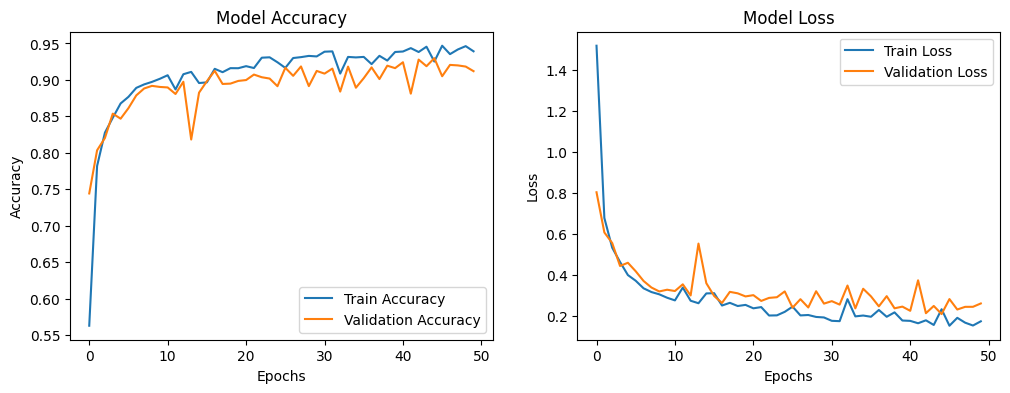

In [10]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()


In [11]:
import numpy as np

# Generate Predictions and True Labels
true_classes = []
predicted_classes = []

for images, labels in test_x:
    predictions = model.predict(images)
    true_classes.extend(labels.numpy())
    predicted_classes.extend(np.argmax(predictions, axis=1))

# Convert lists to numpy arrays
true_classes = np.array(true_classes)
predicted_classes = np.array(predicted_classes)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

2024-11-11 07:02:53.940043: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [12]:
from sklearn.metrics import classification_report

# Generate Classification Report
report = classification_report(true_classes, predicted_classes, target_names=hp["class_names"])
print("Classification Report:")
print(report)


Classification Report:
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.85      0.90       504
                                 Apple___Black_rot       0.90      0.95      0.93       497
                          Apple___Cedar_apple_rust       0.97      0.82      0.89       440
                                   Apple___healthy       0.92      0.95      0.93       502
                               Blueberry___healthy       0.98      0.84      0.91       454
          Cherry_(including_sour)___Powdery_mildew       0.84      0.98      0.90       421
                 Cherry_(including_sour)___healthy       0.98      0.98      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.83      0.89       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight      

Confusion Matrix:
[[427  29   0 ...   0   3   0]
 [  2 474   0 ...   0   0   0]
 [  0   0 361 ...   0   5   2]
 ...
 [  0   0   0 ... 465   0   0]
 [  0   0   0 ...   0 442   0]
 [  0   0   1 ...   0   0 469]]


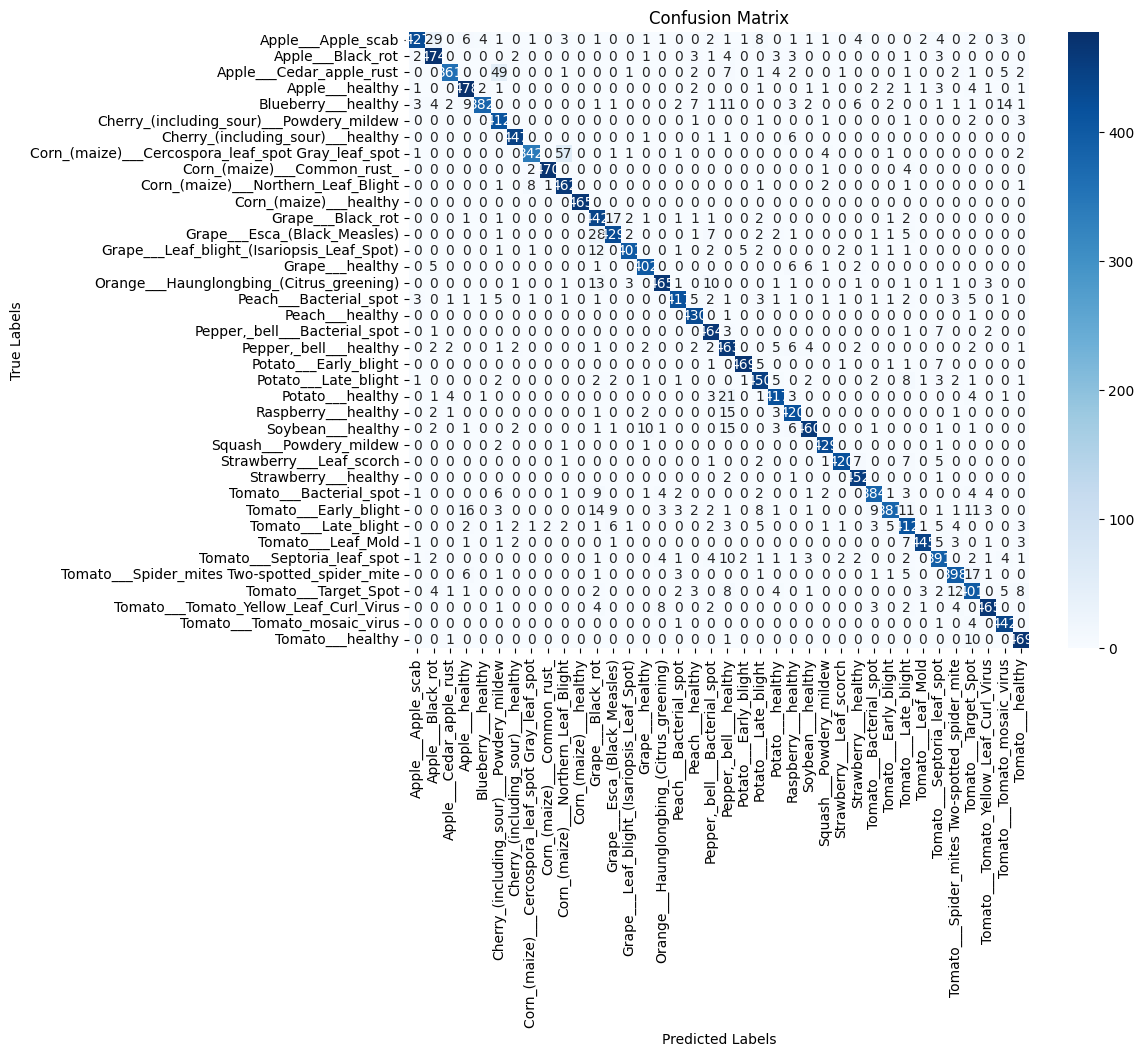

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=hp["class_names"], yticklabels=hp["class_names"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
